1) Find p such that u= [8, -1,0], v=[½,0,4/3], w= [-17/2,1,11/3] and p are in equilibrium.
(Hint: “Equilibrium” means that the resultant of the given vectors is the zero vector)

In [1]:
import numpy as np

list1 = [8,-1,0]
list2 = [1/2,0,4/3]
list3 = [-17/2,1,11/3]

u = np.array(list1)
v = np.array(list2)
w = np.array(list3)

# Equilibrium implies u+v+w+p = 0

p = -(u+v+w)
print("Vector p      : " + str(p))

Vector p      : [-0. -0. -5.]


### 2) Given a curve C: r (t), find a tangent vector r ‘(t), a unit tangent vector u’(t), and the tangent of C at P. Sketch the curve and tangent. r (t) = [t, 1/t, 0], P: (2, 1/2, 0) 

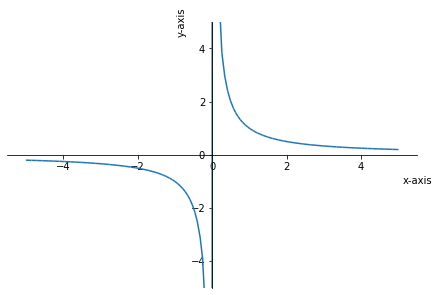

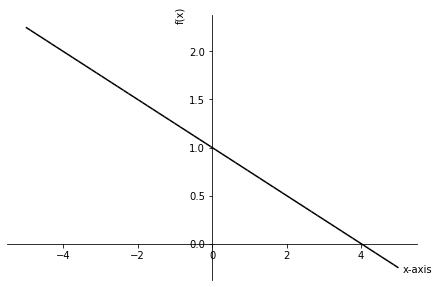

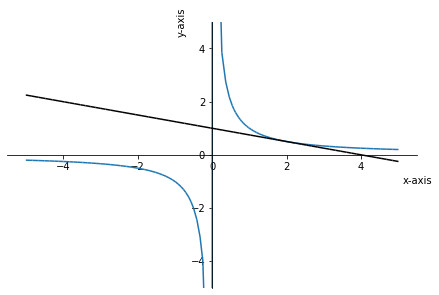

In [4]:
from sympy import Point, symbols
from sympy import diff
from sympy import plot_parametric , plot

t,X = symbols('t,X')
x = t
y = 1/t
point = Point([2, 1/2])
parametric_point = 2 # At P 't' takes a value 2 

#get the slope, intercept and equation of the tangent
x_prime = diff(x,t) #dx/dt
y_prime = diff(y,t) #dy/dt
slope_of_tangent = y_prime.subs(t,parametric_point)/x_prime.subs(t,parametric_point)
intercept = -1*point.x*slope_of_tangent + point.y
eqn_tangent = slope_of_tangent*X+intercept #Y=mX+C

#plot the curve and the tangent
pcurve = plot_parametric((t,1/t), (t, -5, 5),ylim =(-5,5),xlabel ='x-axis',ylabel ='y-axis')
ptangent = plot((eqn_tangent,(X,-5,5)),line_color ='k',xlabel = 'x-axis' )
#ptangent = plot_implicit(Eq(slope_of_tangent*t+intercept, 1/t), (t,-5,5))
pcurve.extend(ptangent)
pcurve.show()

### 3)Prove: The three medians of a triangle (the segments from a vertex to the midpoint of the opposite side)meet at a single point, which divides the medians in the ratio 2: 1 

In [7]:
#Proof 
from sympy.vector import CoordSys3D
from sympy import symbols

#Define the coordinate system and origin
sys = CoordSys3D('sys')
O = sys.origin

#Define the vertices of the triangle
a1, a2, a3 = symbols('a1 a2 a3')
A = O.locate_new('A', a1*sys.i + a2*sys.j + a3*sys.k)
b1, b2, b3 = symbols('b1 b2 b3')
B = O.locate_new('B', b1*sys.i + b2*sys.j + b3*sys.k)
c1, c2, c3 = symbols('c1 c2 c3')
C = O.locate_new('C', c1*sys.i + c2*sys.j + c3*sys.k)

#Get the median vectors
mid_point_AB = O.locate_new('mid_point_AB', A.position_wrt(O) + (B.position_wrt(A) / 2))
mid_point_BC = O.locate_new('mid_point_BC', B.position_wrt(O) + (C.position_wrt(B) / 2))
mid_point_CA = O.locate_new('mid_point_CA', C.position_wrt(O) + (A.position_wrt(C) / 2))

median_1 = mid_point_AB.position_wrt(C)
median_2 = mid_point_BC.position_wrt(A)
median_3 = mid_point_CA.position_wrt(B)

In [8]:
#Get the intersection point

from sympy.geometry import Point, Line

#Get the median lines
line1 = Line(C.express_coordinates(sys),mid_point_AB.express_coordinates(sys))
line2 = Line(A.express_coordinates(sys),mid_point_BC.express_coordinates(sys))
line3 = Line(B.express_coordinates(sys),mid_point_CA.express_coordinates(sys))

#Get the intersection point coordinates
mp_x = line1.intersection(line2)[0][0]
mp_y = line1.intersection(line2)[0][1]
mp_z = line1.intersection(line2)[0][2]

#get the intersection point (i.e centroid of the triangle)
intersection_point = O.locate_new('intersection_point',mp_x*sys.i+mp_y*sys.j+mp_z*sys.k)

In [9]:
line1.intersection(line2)[0][1]

a2/3 + b2/3 + c2/3

In [10]:
mag1 = mid_point_BC.position_wrt(intersection_point).magnitude()
mag2 = intersection_point.position_wrt(A).magnitude()

ratio = mag1/mag2
ratio

sqrt((-a1/3 + b1/6 + c1/6)**2 + (-a2/3 + b2/6 + c2/6)**2 + (-a3/3 + b3/6 + c3/6)**2)/sqrt((-2*a1/3 + b1/3 + c1/3)**2 + (-2*a2/3 + b2/3 + c2/3)**2 + (-2*a3/3 + b3/3 + c3/3)**2)

In [13]:
ratio.subs([(a1, 3), (a2, 9),(a3,0), (b1, 2),(b2,2),(b3,0),(c1,7),(c2,9),(c3,0)])

1/2

### 4) Graph the given velocity field v of a fluid flow in a square centered at the origin with sides parallel to the coordinate axes. Recall that the divergence measures outflow minus inflow. By looking at the flow near the sides of the square, can you see whether div v must be positive or negative or may perhaps be zero? Check by calculating div V 
### (i) V= xi+ yj 
### (ii)  V= xi - yj 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# set up a normalized grid and define the field
dim= 10
xarray= np.arange(-dim,dim)
yarray= np.arange(-dim,dim)
x,y = np.meshgrid(xarray,yarray)

vx = x
vy = -y

<IPython.core.display.Javascript object>


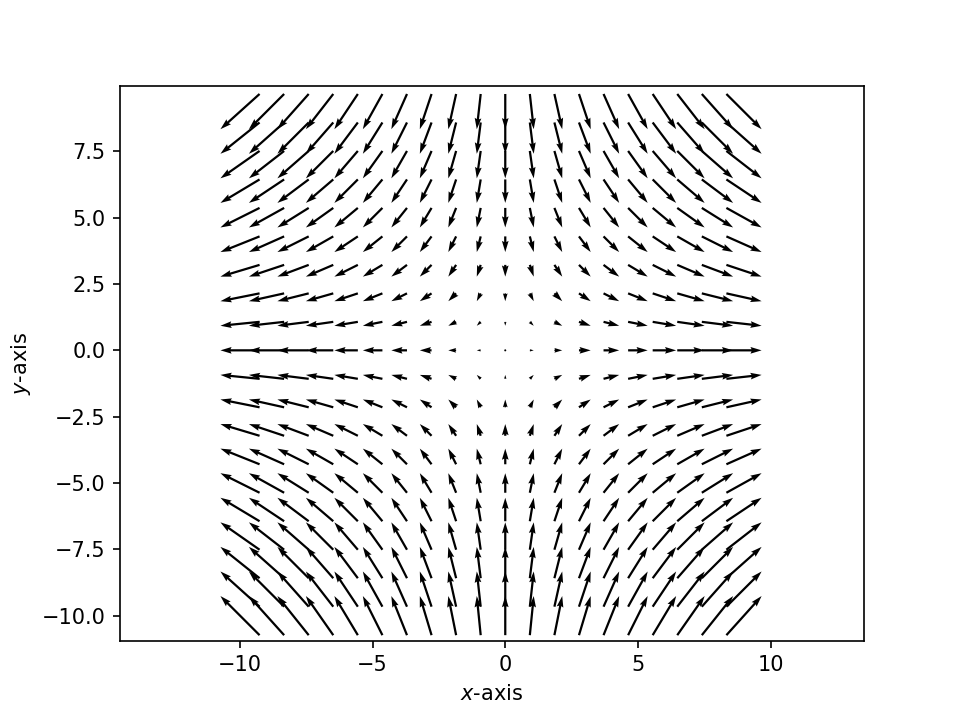

In [15]:
# plot the flow lines:
plt.figure()
plt.quiver(x,y, vx, vy, pivot='mid',color = 'k',angles= 'xy',scale_units = 'xy')
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")
plt.axis('equal')
plt.show()

In [ ]:
#Divergence of a vector
from sympy.vector import CoordSys3D, Del
delop = Del()
div_of_vector = delop.dot(sys.x*sys.i - sys.y*sys.j)
div_of_vector.doit()

In [ ]:
from sympy.vector import divergence
divergence(sys.x*sys.i - sys.y*sys.j)